In [8]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import cv2
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from shiftlab_ocr.doc2text.reader import Reader

In [9]:
h, w, _ = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg").shape

In [10]:
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[:, :]);

In [17]:
reader = Reader()
img = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :int(w * 0.24)]
cv2.imwrite('test.jpg', img)

recognizer weights has loaded from c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\shiftlab_ocr\doc2text\ocr_transformer_4h2l_simple_conv_64x256.pt
requirements: C:\Users\Egor\AppData\Local\Programs\Python\Python310\Lib\site-packages\shiftlab_ocr\doc2text\yolov5\requirements.txt not found, check failed.


True

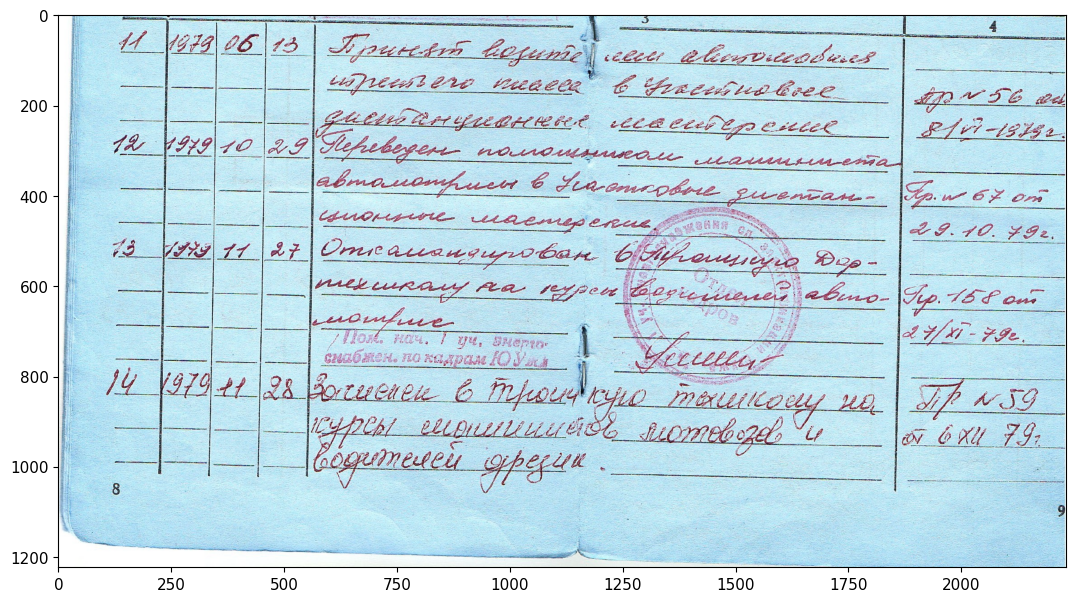

In [18]:
plt.subplots(figsize=[13, 15])
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :])

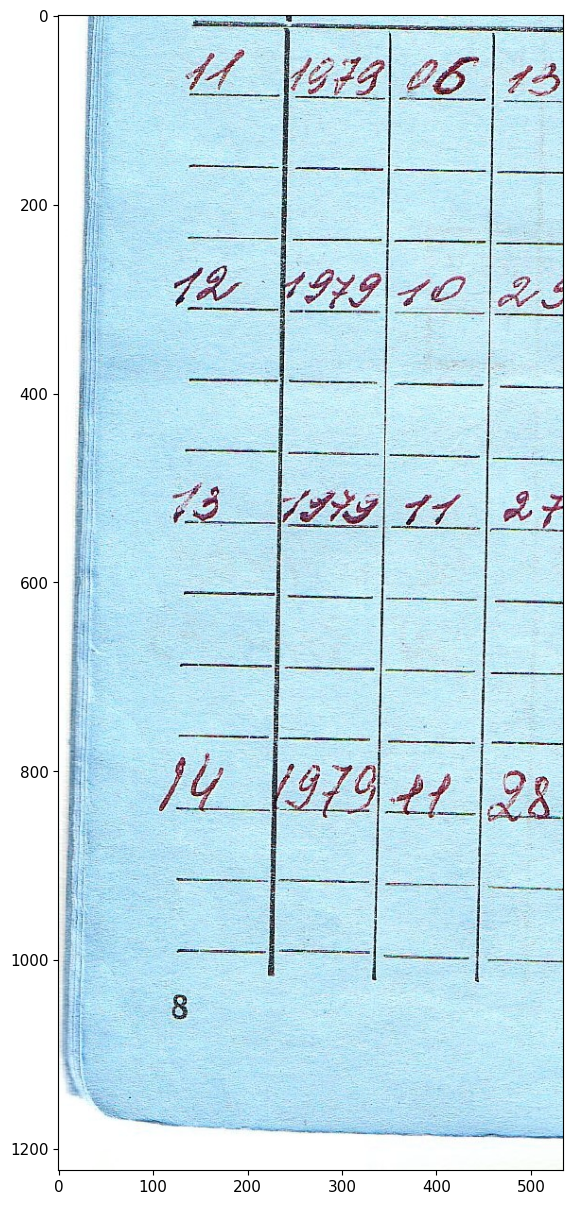

In [19]:
plt.subplots(figsize=[13, 15])
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :int(w * 0.24)])

In [20]:
result = reader.doc2text("test.jpg")

In [21]:
def calculate_y_distances(boxes: list, y_max: float) -> list:
    # Создаем список для хранения расстояний
    distances = []
    
    # Проходим по списку box-ов, рассчитывая расстояния между последовательными парами
    for i in range(len(boxes) - 1):
        # Первый box
        box1_top_y = boxes[i][0][1]
        box1_bottom_y = boxes[i][1][1]

        # Второй box
        box2_top_y = boxes[i + 1][0][1]
        box2_bottom_y = boxes[i + 1][1][1]

        # Расчет расстояния между нижней границей первого box и верхней второго
        if box1_bottom_y < box2_top_y:
            distance = box2_top_y - box1_bottom_y
        elif box2_bottom_y < box1_top_y:
            distance = box1_top_y - box2_bottom_y
        else:
            # Box-ы перекрываются по y
            distance = 0
        if distance > 0:
            # Добавляем расстояние в список
            distances.append((box1_top_y, box2_top_y))
    distances.append((boxes[-1][0][1], y_max))
    return distances

[[128.36593627929688, 34.466068267822266], [206.0113067626953, 84.5112075805664]]
11 True True
[[254.0416259765625, 41.992130279541016], [352.75213623046875, 89.03530883789062]]
979 True True
[[258.64569091796875, 31.38813591003418], [437.4620666503906, 92.0782470703125]]
979 True True
[[365.6466064453125, 40.60739517211914], [447.759765625, 89.02156829833984]]
06 True True
[[466.8621826171875, 38.598480224609375], [535.0, 94.60384368896484]]
06 True True
[[114.9510269165039, 254.27098083496094], [199.29953002929688, 314.86102294921875]]
13 True True
[[245.3640594482422, 261.7354736328125], [339.31951904296875, 309.3543701171875]]
12 True True
[[353.3056335449219, 268.23480224609375], [440.1166076660156, 312.0672302246094]]
1979 True True
[[242.54335021972656, 262.0325622558594], [441.65966796875, 321.1445007324219]]
10 True True
[[459.052490234375, 265.91241455078125], [535.0, 321.2208251953125]]
1979 True True
[[113.14031982421875, 493.8980407714844], [179.5890655517578, 540.10076904

IndexError: list index out of range

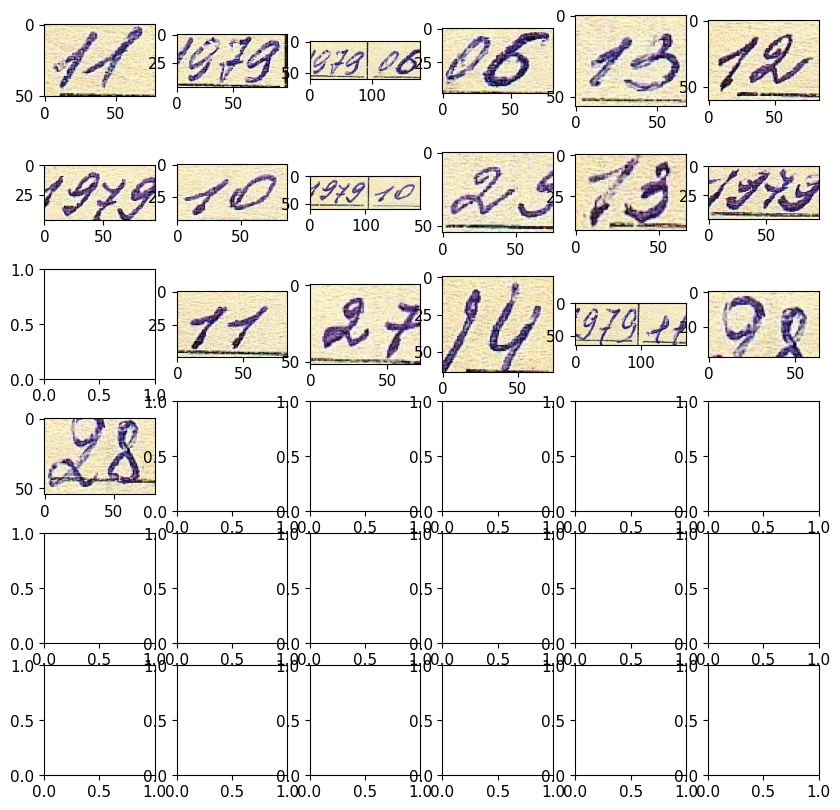

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        if dt[k].replace('.', '').replace(')', '').isdigit():
            axarr[i, j].imshow(images[k].img)
            dt_box.append(images[k].points)
            print(images[k].points)
            print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)

In [23]:
for i in calculate_y_distances(dt_box, img.shape[0]):
    print(i)

(38.598480224609375, 254.27098083496094)
(265.91241455078125, 493.8980407714844)
(495.3547668457031, 777.0330200195312)
(804.40869140625, 1223)


In [24]:
def get_data_columns(img: np.ndarray, string_cords: list, ocr_modul: Reader) -> dict:
    data = {
        'number_data': [],
        'grants_or_work': [],
        'description': []
    }

    for elem in string_cords:
        img_tmp = img[int(round(elem[0])):int(round(elem[1])), :]
        col_1, col_2, col_3 = (img_tmp[:, :int(w * 0.24)],
                       img_tmp[:, int(w * 0.22):int(w * 0.8)],
                       img_tmp[:, int(w * 0.78):])
        cv2.imwrite('col_1.jpg', col_1)
        cv2.imwrite('col_2.jpg', col_2)
        cv2.imwrite('col_3.jpg', col_3)
        result_1, result_2, result_3 = (ocr_modul.doc2text("col_1.jpg"), 
                                        ocr_modul.doc2text("col_2.jpg"), 
                                        ocr_modul.doc2text("col_3.jpg"))
        data['number_data'].append(' '.join([i.replace('.', '').replace(')', '') 
                                    for i in result_1[0].split() if i.replace('.', '').replace(')', '').isdigit()]))
        data['grants_or_work'].append(result_2[0])
        data['description'].append(result_3[0])
    return data

In [28]:
img = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :int(w * 0.24)]
cv2.imwrite('test.jpg', img)

True

In [29]:
result = reader.doc2text("test.jpg")

In [30]:
result[0]

'11 979 979 06 06 13 12 1979 10 1979 10 2 б 13 1975 1979 11 27 14 9791 98 28 '

In [31]:
images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
for i in range(n):
    for j in range(n):
        if dt[k].replace('.', '').replace(')', '').isdigit():
            dt_box.append(images[k].points)
        k += 1
print(dt_box)

IndexError: list index out of range

In [ ]:
img.shape[0]

1185

In [ ]:
calculate_y_distances(dt_box, img.shape[0])

[(20.86008644104004, 175.54579162597656),
 (170.1675262451172, 259.2975158691406),
 (250.2474822998047, 335.21807861328125),
 (341.7716979980469, 474.1774597167969),
 (476.8173828125, 574.8814697265625),
 (545.7362060546875, 718.5145874023438),
 (714.450439453125, 1185)]

In [32]:
get_data_columns(
    img=cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :],
    string_cords=calculate_y_distances(dt_box, img.shape[0]),
    ocr_modul=reader
)

{'number_data': ['21 4783 1819', '19', '978 1973 12169', '23 13 23 1013'],
 'grants_or_work': ['3 Принят возите свои авитомобил его изретьего плаева иход 2940 в 028 видит ',
  '9 Переведен помомеником машиние автомотримы в Участковые дистан ционные масту спене ВНИМАНИЕ ',
  '7 быле сма Отсама крирован Туращисую езла ДОО там тексикаму на др. разреш водимелей т.к. авин пло отрие 17.12.13 19.23.16 1606г. 1 уч. 04469711 12 кв.7013 840 04780 Усилий ',
  'Д. волисием В просла чно технологу МО что сурсы сидимирие ез вителов по) Мотоводов 18 одителей урезик '],
 'description': ['при в него под РАЗВЕРНУТМ АНИ АТВА ар двания для ВНИМА поль 19 туля к. ка 1943г. ',
  'ВНИМАНИЕ ВНИМ выделия ВНИМА разбора гипор ная из котор Код региона по ме лить тор в у очего ВНИМАНИЕ А. пор др.813 д.В. 2 29 ',
  'Название 16 на 19 БЛАНКА тогда ул. 10 в ест ада ВНИМА наз 08 отв 171 у ода ВНИМАНИЕ ',
  'подгрез веннут 19 ул. для 2.12 стал двина А. ВТВ од. слу 12 ']}

In [33]:
pd.DataFrame(get_data_columns(
    img=cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :],
    string_cords=calculate_y_distances(dt_box, img.shape[0]),
    ocr_modul=reader
))

,number_data,grants_or_work,description
0,21 4783 1819,3 Принят возите свои авитомобил его изретьего ...,при в него под РАЗВЕРНУТМ АНИ АТВА ар двания д...
1,19,9 Переведен помомеником машиние автомотримы в ...,ВНИМАНИЕ ВНИМ выделия ВНИМА разбора гипор ная ...
2,978 1973 12169,7 быле сма Отсама крирован Туращисую езла ДОО ...,Название 16 на 19 БЛАНКА тогда ул. 10 в ест ад...
3,23 13 23 1013,Д. волисием В просла чно технологу МО что сурс...,подгрез веннут 19 ул. для 2.12 стал двина А. В...


In [57]:
res = reader.doc2text("col_1.jpg")

In [58]:
res[0]

'16 05 от ходе РАЗВЕРНУТМ ОТВЕТОМ Название предмета РАЗВЕРНУТМ ОТВЕТОМ РАЗВЕРНУТМ ОТВЕТОМ 18 '

16 True True
[[119.84341430664062, 11.895404815673828], [192.48855590820312, 38.18301010131836]]
05 True True
[[217.14065551757812, 6.7195963859558105], [293.8866271972656, 38.025054931640625]]
от False False
[[332.3280944824219, 3.657954692840576], [402.3653259277344, 35.720516204833984]]
ходе False False
[[417.6071472167969, 4.222253799438477], [526.8129272460938, 34.752708435058594]]
РАЗВЕРНУТМ False False
[[111.42572021484375, 111.43669128417969], [211.32334899902344, 128.7506866455078]]
ОТВЕТОМ False False
[[223.9102783203125, 113.88329315185547], [319.5343322753906, 129.68231201171875]]
Название False False
[[116.40862274169922, 185.630615234375], [209.25645446777344, 205.1145477294922]]
предмета False False
[[329.23529052734375, 257.4064636230469], [432.28558349609375, 274.72113037109375]]
РАЗВЕРНУТМ False False
[[110.79296112060547, 315.5582580566406], [167.7489471435547, 339.80096435546875]]
ОТВЕТОМ False False


IndexError: list index out of range

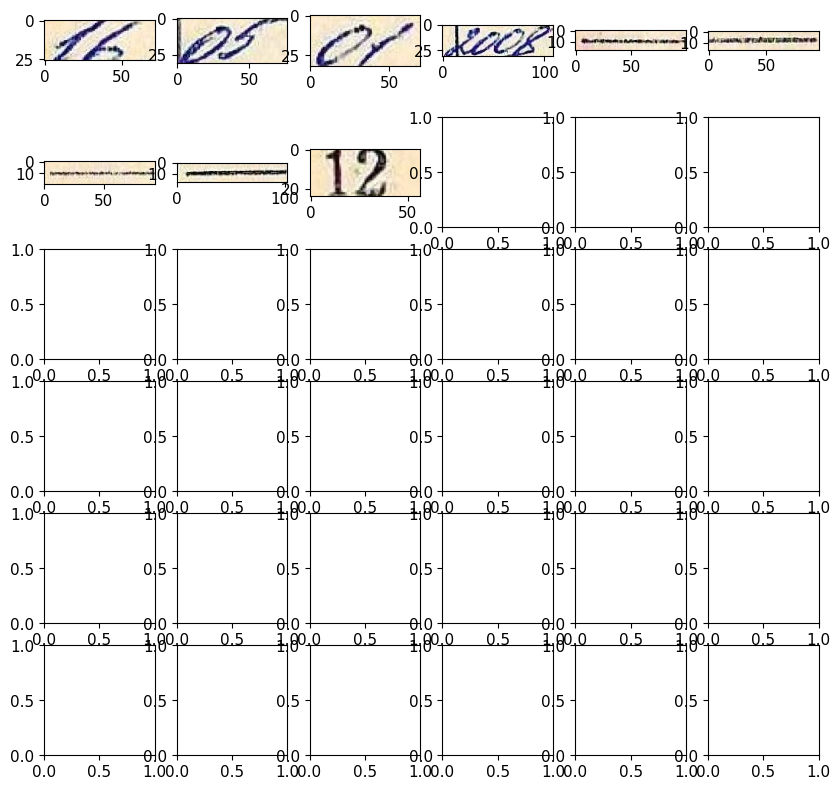

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

images = res[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = res[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        # if dt[k].replace('.', '').replace(')', '').isdigit():
        axarr[i, j].imshow(images[k].img)
        dt_box.append(images[k].points)
        print(images[k].points)
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)

In [ ]:
import cv2
import pytesseract
import re

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


def classify_by_path(path):
    img = cv2.imread(path)
    text = pytesseract.image_to_string(img, lang='rus')
    text = text.replace('\n', '').replace(' ', '').lower()
    if 'трудоваякнижка' in text and not (('сведен' in text and 'ия' in text) or 'сведения' in text):
        return 'main_page'
    elif (('сведен' in text and 'ия' in text) or 'сведения' in text) and 'трудоваякнижка' not in text:
        return 'job_info'
    else:
        return 'bad_page'


def classify_by_img(img):
    text = pytesseract.image_to_string(img, lang='rus')
    text = text.replace('\n', '').replace(' ', '').lower()
    if 'трудоваякнижка' in text and not (('сведен' in text and 'ия' in text) or 'сведения' in text):
        return 'main_page'
    elif (('сведен' in text and 'ия' in text) or 'сведения' in text) and 'трудоваякнижка' not in text:
        return 'job_info'
    else:
        return 'bad_page'